In [50]:
import pandas as pd
import sqlite3
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
import sklearn.preprocessing as skpp

from IPython.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [3]:
con = sqlite3.connect('G1-2022-03-23.db')

In [4]:
df = pd.read_sql("SELECT * FROM sqlite_master;",con)
df

,type,name,tbl_name,rootpage,sql
0,table,GPSDATA,GPSDATA,2,"CREATE TABLE GPSDATA (DATE TEXT,BUSID TEXT,LIN..."
1,table,METADATAPH1,METADATAPH1,5190,"CREATE TABLE METADATAPH1 (BUSID TEXT, VAL TEXT)"
2,table,METADATAPH2,METADATAPH2,38230,"CREATE TABLE METADATAPH2 (BUSID TEXT, MOTIF TE..."


In [6]:
df = pd.read_sql("SELECT * FROM gpsdata;",con)
df.sort_values('DATE', inplace=True)
df

,DATE,BUSID,LINE,LATITUDE,LONGITUDE,VELOCITY
218269,03-22-2022 02:48:22,B25554,249.0,-22.84148,-43.25320,1.0
51506,03-22-2022 04:39:57,B32530,399.0,-22.88559,-43.22843,24.0
33624,03-22-2022 04:44:01,B28547,324.0,-22.81513,-43.18871,0.0
18369,03-22-2022 05:21:14,C50209,805.0,-22.99118,-43.36566,67.0
141553,03-22-2022 06:27:23,B32820,457.0,-22.90081,-43.22382,35.0
...,...,...,...,...,...,...
335891,03-23-2022 22:58:54,A41278,309.0,-22.87505,-43.24097,0.0
81566,03-23-2022 22:58:54,B10034,328.0,-22.90514,-43.19182,0.0
7041,03-23-2022 22:58:55,A48151,426.0,-22.92478,-43.24613,50.0
176949,03-23-2022 22:58:55,A41289,309.0,-22.87495,-43.24135,0.0


D17031 220
840.0    110
893.0    110
Name: LINE, dtype: int64


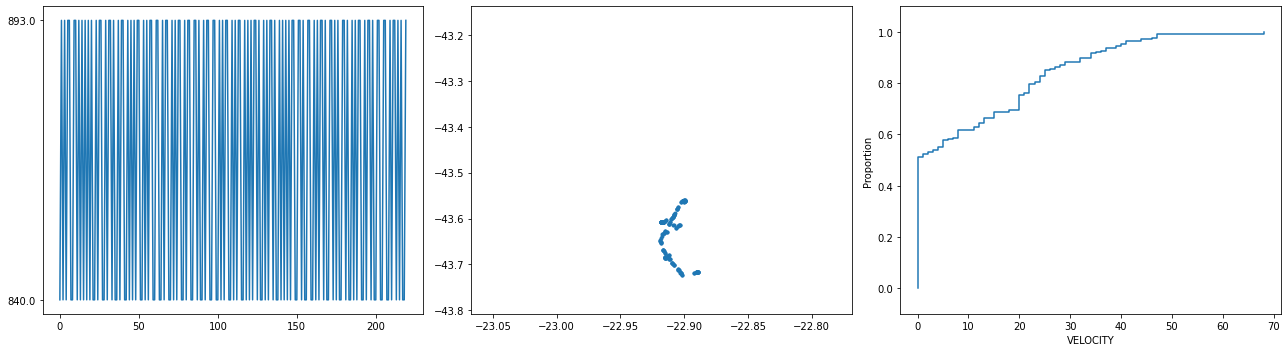

---------------------------------------------------------------------------------------------------------------
D17168 156
770.0    135
771.0     21
Name: LINE, dtype: int64


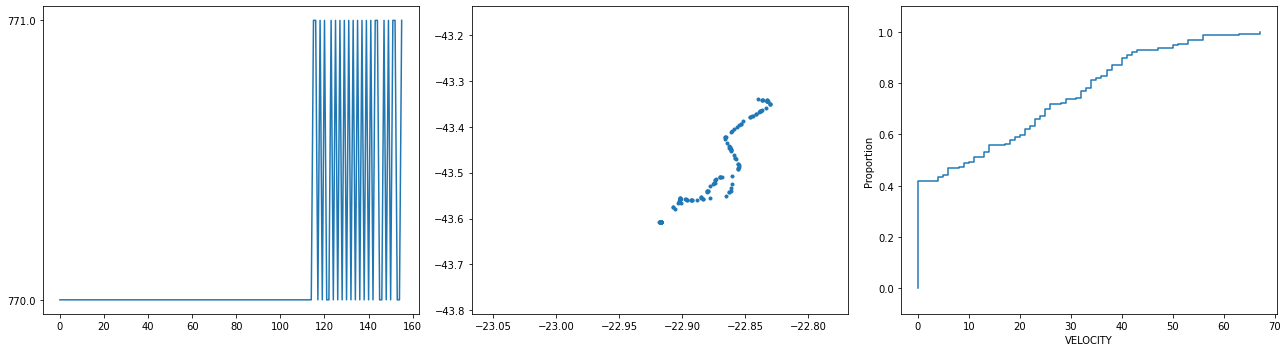

---------------------------------------------------------------------------------------------------------------
D17046 145
892.0    121
840.0     21
849.0      3
Name: LINE, dtype: int64


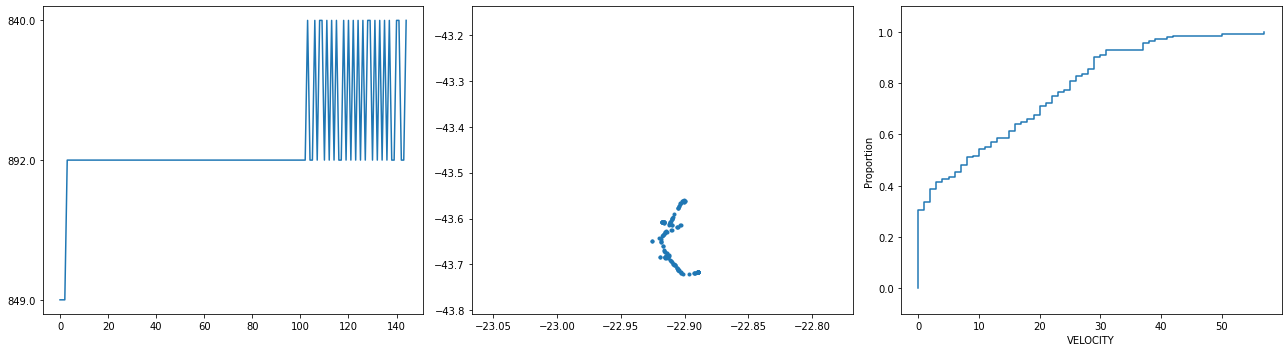

---------------------------------------------------------------------------------------------------------------
D87119 143
868.0    110
821.0     33
Name: LINE, dtype: int64


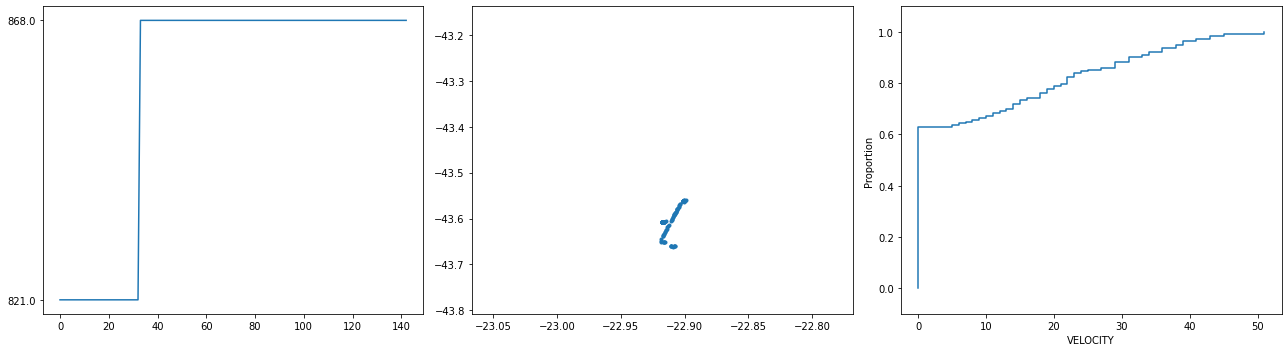

---------------------------------------------------------------------------------------------------------------
D17004 142
821.0    105
895.0     20
842.0     17
Name: LINE, dtype: int64


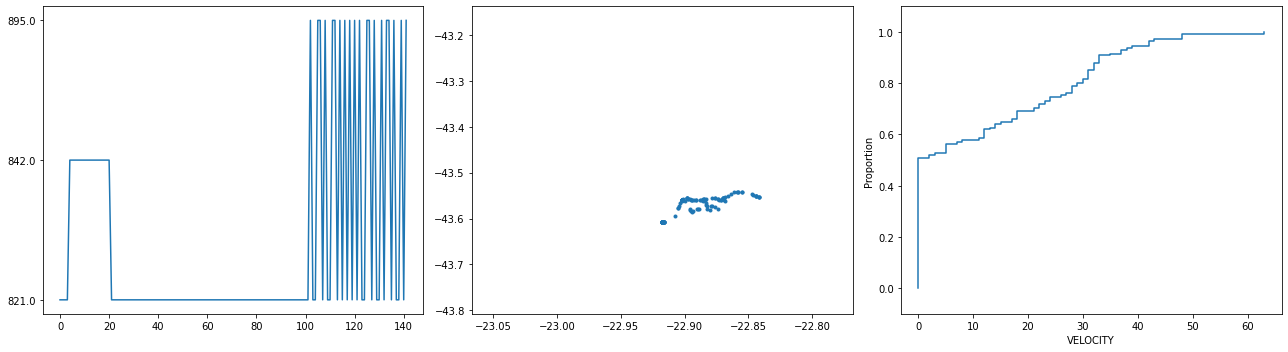

---------------------------------------------------------------------------------------------------------------
D17062 142
869.0    142
Name: LINE, dtype: int64


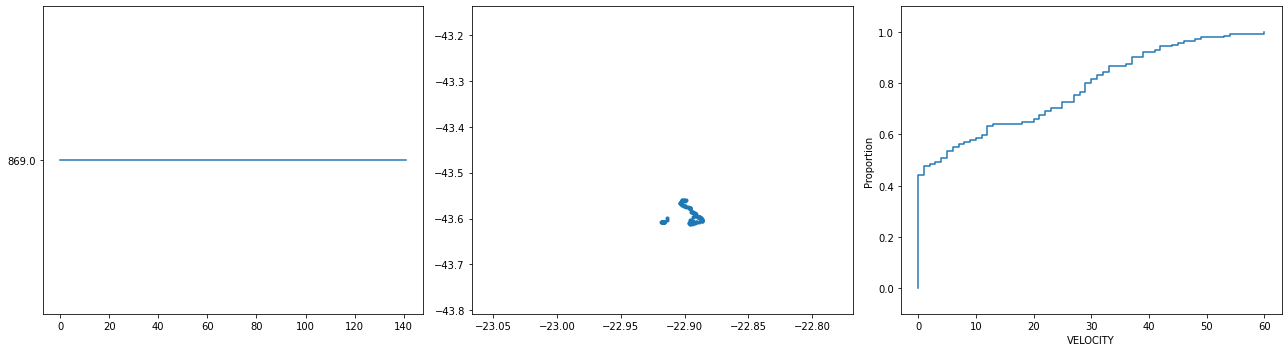

---------------------------------------------------------------------------------------------------------------
D17137 142
770.0    120
771.0     22
Name: LINE, dtype: int64


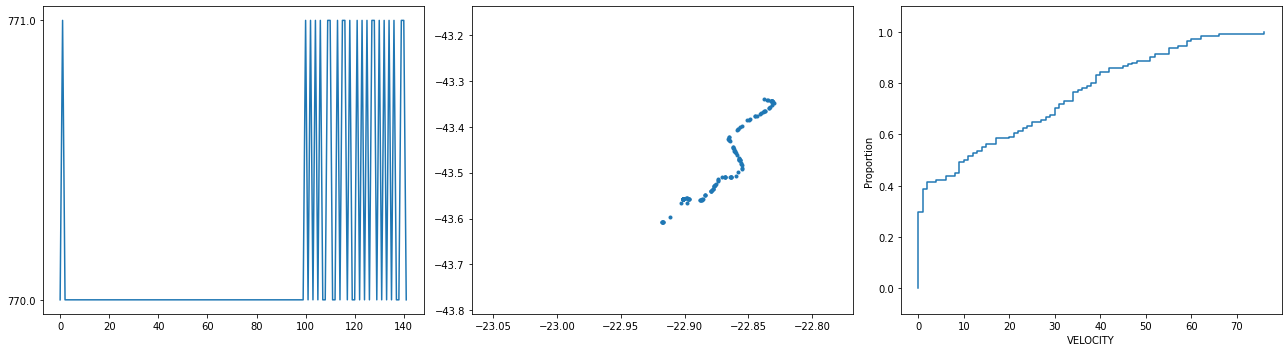

---------------------------------------------------------------------------------------------------------------
D17155 141
770.0    119
771.0     22
Name: LINE, dtype: int64


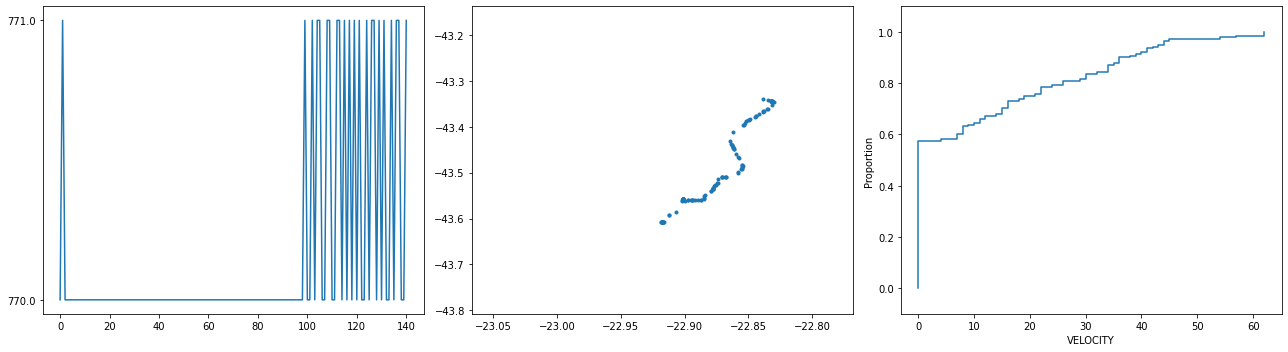

---------------------------------------------------------------------------------------------------------------
D17125 141
840.0    141
Name: LINE, dtype: int64


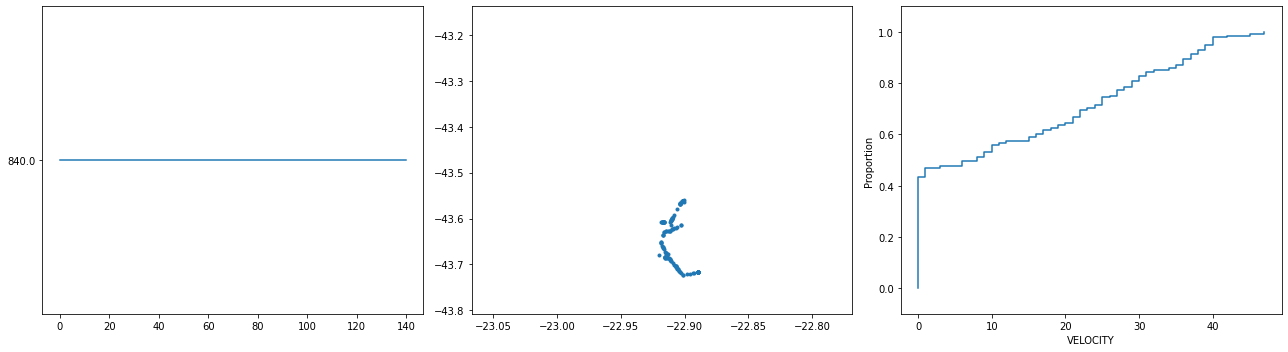

---------------------------------------------------------------------------------------------------------------
D17047 140
892.0    116
840.0     24
Name: LINE, dtype: int64


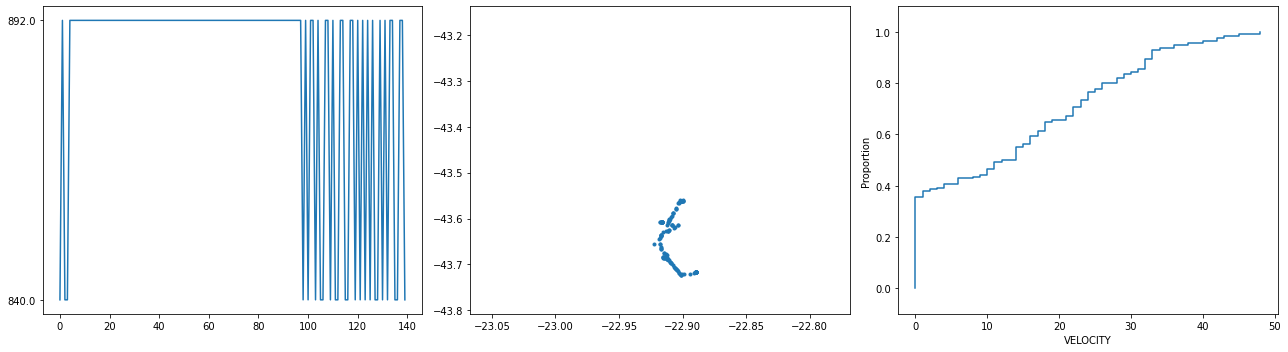

---------------------------------------------------------------------------------------------------------------


In [42]:
busid_groups = df.groupby('BUSID')

for i in busid_groups.size().sort_values(ascending=False).index[:10]:
    aux = df.loc[busid_groups.groups[i]]
    
    print(i, len(aux))
    print(aux.LINE.value_counts())
    
    plt.figure(figsize=(18,5))
    
    plt.subplot(131)
    plt.plot(range(len(aux.LINE)), aux.LINE)
    
    plt.subplot(132)
    plt.plot(aux.LATITUDE, aux.LONGITUDE, '.')
    plt.xlim((df.LATITUDE.min(), df.LATITUDE.max()))
    plt.ylim((df.LONGITUDE.min(), df.LONGITUDE.max()))
    #plt.hist2d(aux.LATITUDE, aux.LONGITUDE, bins=10, cmap='Greens')
    
    plt.subplot(133)
    sns.ecdfplot(aux.VELOCITY)
    plt.ylim((-.1, 1.1))
    
    plt.tight_layout()
    plt.show()
    
    print('-'*111)

550.0 5887 89


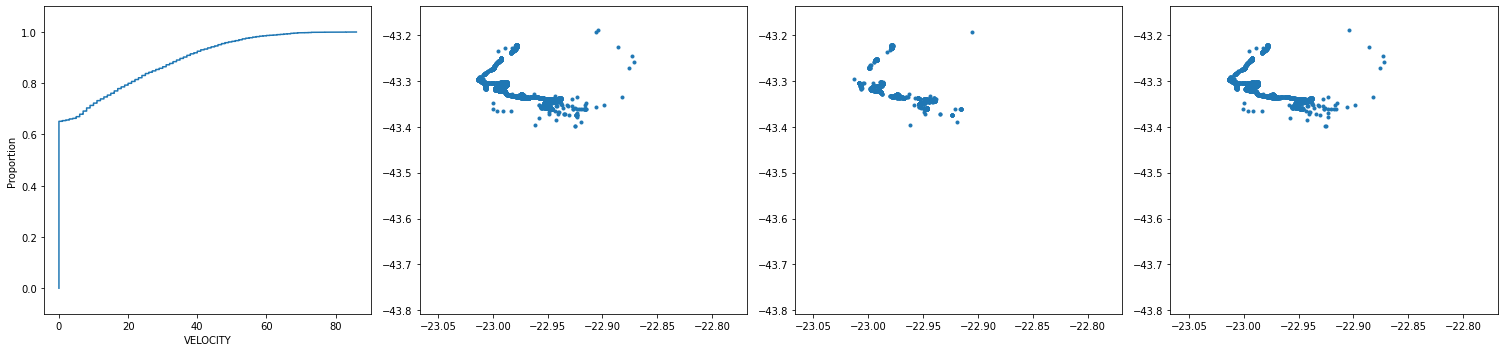

191


-1      866
 66     149
 80      77
 46      72
 70      68
       ... 
 3       11
 1       11
 150     11
 165     11
 130     10
Length: 191, dtype: int64

159


-1      1787
 22      212
 6       151
 8       103
 34       79
        ... 
 76       11
 150      11
 104      11
 116      11
 61       10
Length: 159, dtype: int64

161


-1     1784
 30     208
 6      150
 52     123
 9       98
       ... 
 58      10
 79      10
 41      10
 17      10
 7       10
Length: 161, dtype: int64

129


 21     1538
-1       730
 12      205
 5       150
 20      150
        ... 
 87       11
 116      11
 91       11
 6        11
 96       10
Length: 129, dtype: int64

---------------------------------------------------------------------------------------------------------------
309.0 5404 67


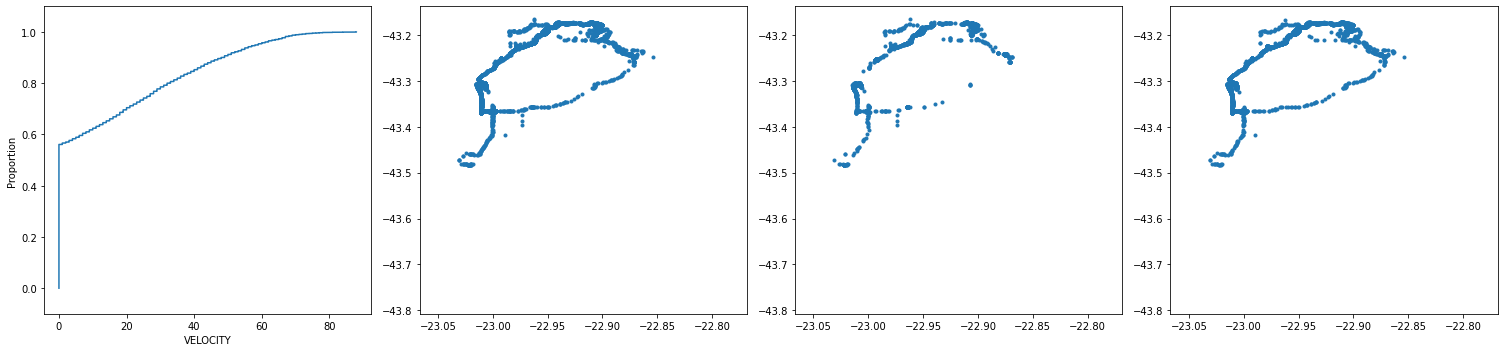

146


-1      905
 143    338
 102    117
 82      77
 142     77
       ... 
 140     11
 80      11
 120     10
 75      10
 106     10
Length: 146, dtype: int64

99


-1     2243
 96     350
 43     173
 50     125
 31     121
       ... 
 53      10
 86      10
 15      10
 93      10
 40      10
Length: 99, dtype: int64

93


-1     2243
 91     344
 38     123
 21     119
 25     114
       ... 
 33      12
 2       12
 66      10
 17      10
 53      10
Length: 93, dtype: int64

68


 15    945
-1     777
 29    503
 38    467
 37    436
      ... 
 39     12
 24     11
 43     11
 54     10
 13     10
Length: 68, dtype: int64

---------------------------------------------------------------------------------------------------------------
565.0 5167 69


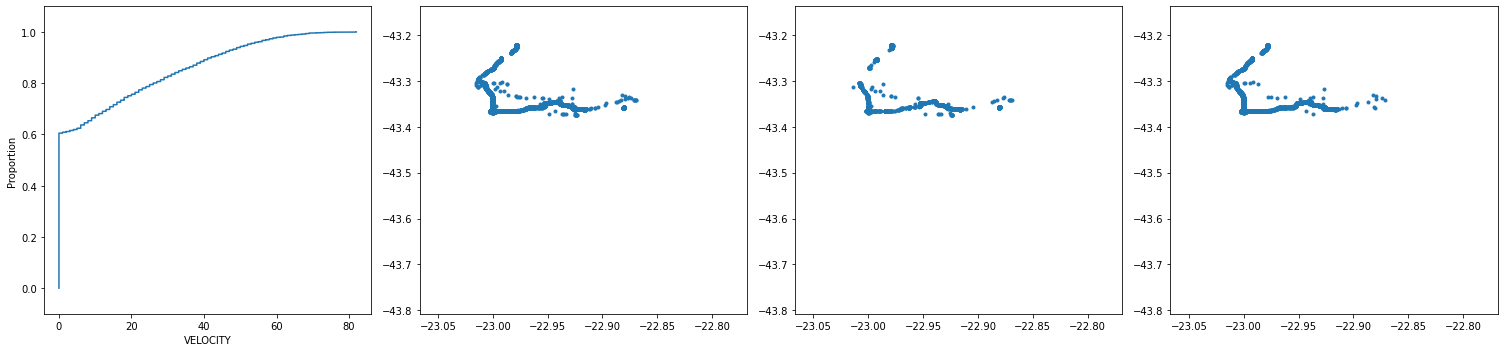

174


-1      561
 66     181
 111    151
 125     73
 29      66
       ... 
 90      11
 76      11
 97      11
 65      11
 131     11
Length: 174, dtype: int64

135


-1     1541
 8      182
 69     151
 43     141
 33      99
       ... 
 64      11
 22      11
 92      11
 51      10
 57      10
Length: 135, dtype: int64

134


-1     1501
 10     181
 76     151
 43     132
 34     105
       ... 
 13      11
 58      11
 90      11
 7       10
 25      10
Length: 134, dtype: int64

110


 0      826
-1      600
 47     376
 24     319
 52     189
       ... 
 55      11
 20      11
 19      11
 83      10
 106     10
Length: 110, dtype: int64

---------------------------------------------------------------------------------------------------------------
371.0 5080 48


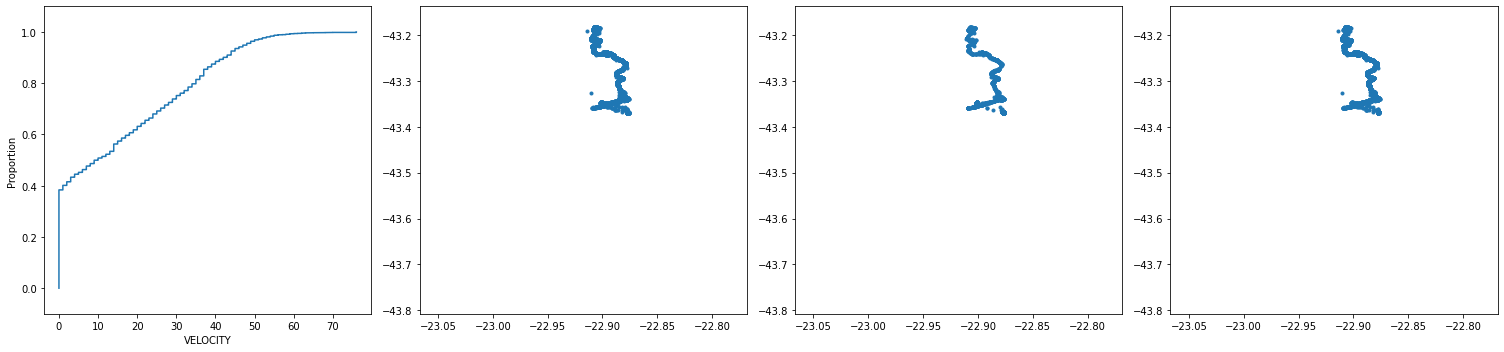

139


-1      449
 85     192
 13     131
 70     107
 16      91
       ... 
 119     11
 86      11
 136     10
 82      10
 120     10
Length: 139, dtype: int64

102


-1     2226
 77     199
 36     119
 70     116
 94      92
       ... 
 55      11
 38      11
 7       11
 64      10
 56      10
Length: 102, dtype: int64

104


-1     2167
 83     199
 71     129
 40     119
 38      81
       ... 
 28      11
 45      11
 81      11
 37      10
 7       10
Length: 104, dtype: int64

65


 0     3059
-1      211
 15     192
 21     160
 35     111
       ... 
 28      12
 14      12
 58      11
 34      11
 33      11
Length: 65, dtype: int64

---------------------------------------------------------------------------------------------------------------
864.0 4800 111


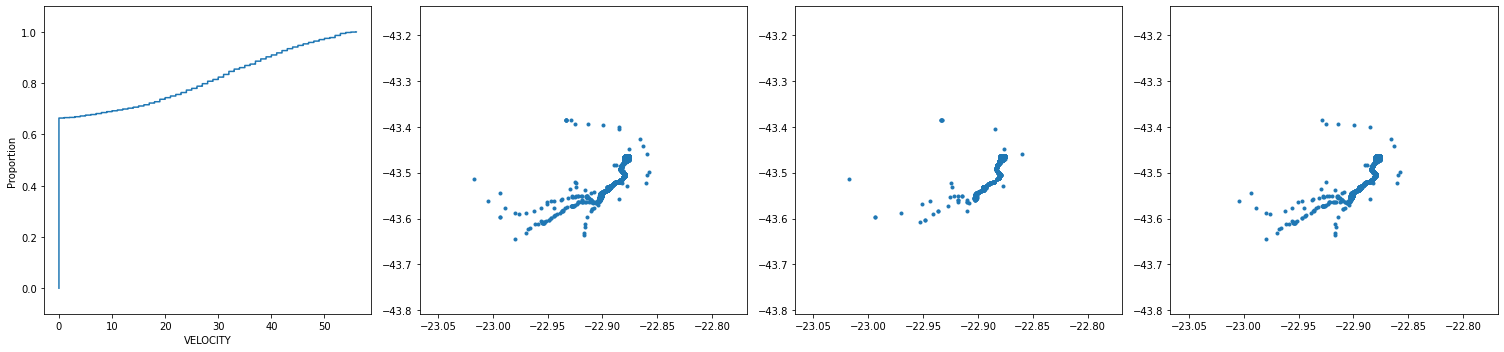

133


-1      796
 94     293
 65     166
 101    145
 126     98
       ... 
 56      12
 71      12
 119     12
 90      11
 10      11
Length: 133, dtype: int64

87


-1     1209
 37    1104
 45     293
 17     163
 54      72
       ... 
 0       11
 25      11
 7       11
 39      10
 53      10
Length: 87, dtype: int64

102


-1     1806
 58     293
 3      163
 38     159
 66     106
       ... 
 16      10
 70      10
 39      10
 56      10
 57      10
Length: 102, dtype: int64

74


 6     989
-1     702
 41    416
 40    306
 64    192
      ... 
 38     12
 47     12
 19     11
 72     10
 50     10
Length: 74, dtype: int64

---------------------------------------------------------------------------------------------------------------
639.0 4568 77


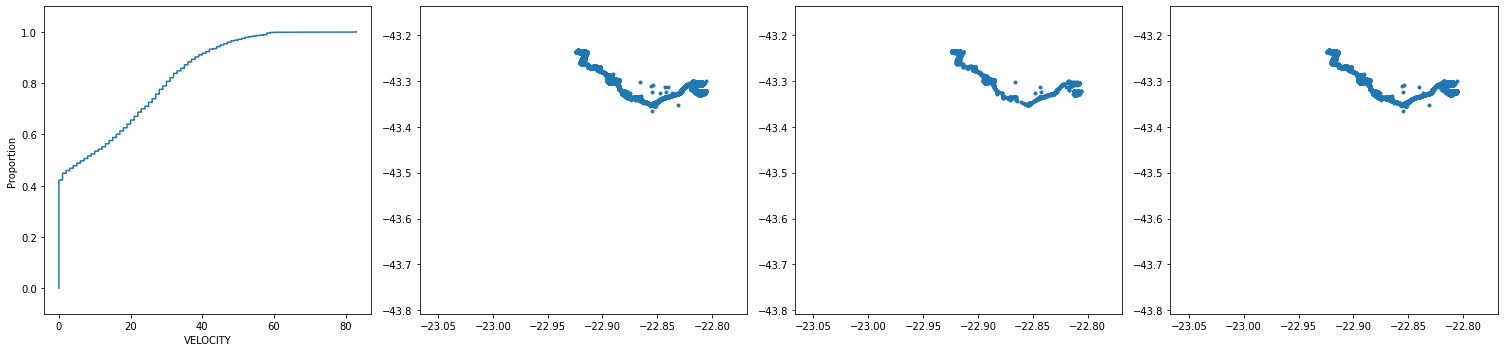

96


 70    727
-1     309
 58    271
 93    123
 32     84
      ... 
 30     12
 90     11
 83     11
 0      11
 75     11
Length: 96, dtype: int64

59


-1     1848
 21     725
 4      284
 36     150
 57     137
 16      96
 33      95
 49      62
 42      53
 55      45
 45      39
 52      39
 35      37
 10      37
 26      35
 39      35
 19      35
 44      34
 15      33
 29      32
 6       32
 32      32
 43      31
 37      30
 38      27
 56      27
 14      27
 3       25
 22      23
 9       23
 8       22
 1       21
 48      21
 50      19
 28      19
 13      18
 5       17
 20      17
 25      17
 51      16
 23      16
 18      16
 11      16
 24      15
 54      15
 30      14
 34      14
 27      14
 0       13
 46      13
 40      13
 53      13
 41      12
 31      12
 47      12
 17      12
 12      11
 2       11
 7       11
dtype: int64

61


-1     1641
 30     726
 12     465
 7      265
 28     153
       ... 
 57      11
 32      11
 47      10
 17      10
 33      10
Length: 61, dtype: int64

32


 0     2639
 3      727
 13     269
-1      169
 27     117
 23      64
 17      46
 11      35
 10      35
 8       34
 30      33
 5       33
 2       31
 28      31
 7       26
 26      25
 1       23
 6       22
 19      22
 22      20
 16      17
 18      16
 20      16
 4       15
 12      15
 29      14
 21      14
 25      14
 9       12
 14      12
 15      11
 24      11
dtype: int64

---------------------------------------------------------------------------------------------------------------
624.0 4444 46


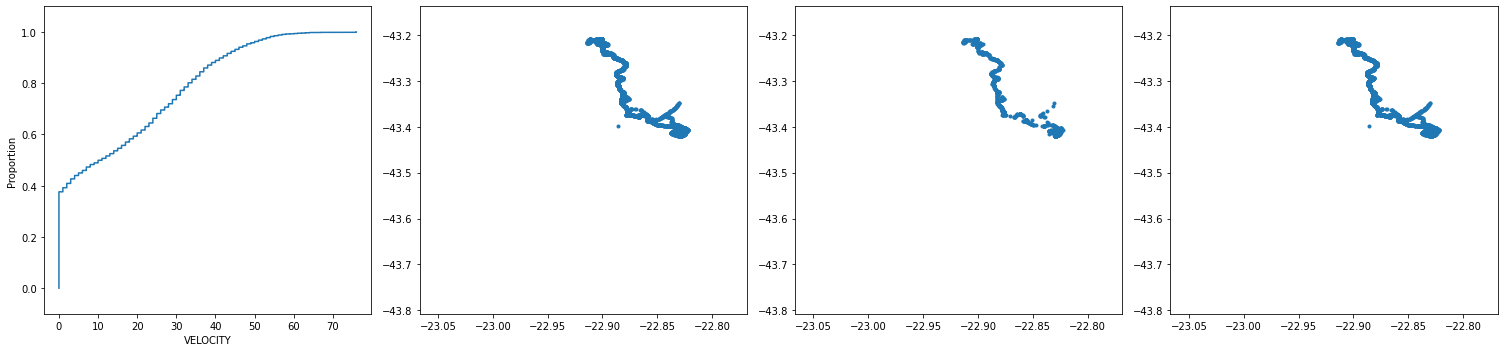

115


-1      501
 57     159
 21      84
 51      82
 45      82
       ... 
 99      11
 108     11
 106     11
 75      11
 96      11
Length: 115, dtype: int64

86


-1     2046
 4      345
 46     169
 35      75
 39      71
       ... 
 72      11
 25      10
 55      10
 34      10
 31      10
Length: 86, dtype: int64

80


-1     1966
 5      334
 42     167
 29     151
 21     148
       ... 
 34      11
 64      11
 6       11
 57      11
 51      10
Length: 80, dtype: int64

52


 2     2736
-1      356
 12     144
 30     109
 22      68
 18      59
 19      49
 16      46
 17      42
 41      41
 7       37
 21      35
 3       35
 14      31
 47      27
 5       27
 6       27
 23      25
 37      25
 38      23
 33      23
 44      23
 31      21
 24      20
 34      20
 50      19
 8       19
 40      19
 9       19
 28      18
 27      17
 25      17
 43      17
 36      17
 26      16
 49      15
 32      15
 1       15
 42      15
 13      15
 48      14
 11      13
 29      13
 46      13
 4       12
 15      12
 39      11
 0       11
 20      11
 35      11
 45      11
 10      10
dtype: int64

---------------------------------------------------------------------------------------------------------------
483.0 4255 59


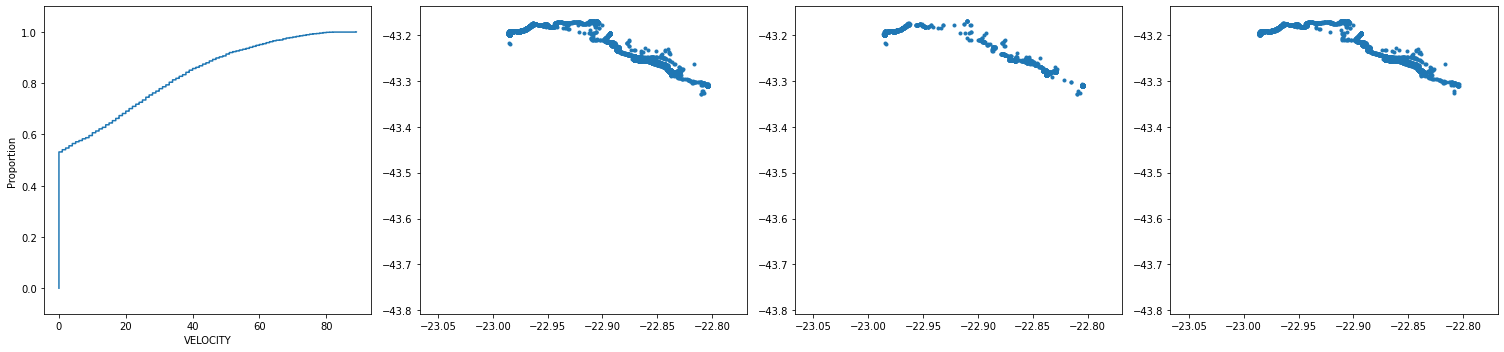

115


 43     826
-1      363
 85     190
 110    187
 109    127
       ... 
 0       12
 70      12
 91      11
 99      11
 101     10
Length: 115, dtype: int64

50


-1     1524
 2      855
 20     190
 45     188
 44     130
 13     105
 29     101
 24      75
 4       73
 5       71
 3       66
 25      63
 23      61
 46      48
 31      35
 14      31
 22      31
 33      31
 21      28
 9       27
 34      25
 10      25
 30      23
 11      21
 48      21
 41      21
 42      21
 27      21
 17      20
 47      20
 15      19
 7       19
 35      17
 16      17
 37      17
 28      17
 12      17
 26      16
 36      16
 19      16
 32      15
 40      14
 18      14
 43      14
 6       14
 8       13
 38      13
 1       13
 39      12
 0       11
dtype: int64

52


-1     1553
 1      834
 18     191
 47     188
 46     132
 4       80
 5       78
 27      75
 28      70
 41      62
 26      60
 6       59
 15      58
 48      50
 29      45
 33      37
 14      35
 30      33
 25      31
 24      30
 8       28
 11      27
 17      27
 32      25
 12      25
 44      21
 50      21
 43      21
 23      20
 49      19
 22      19
 16      17
 10      17
 38      17
 37      17
 21      16
 39      16
 35      16
 34      15
 42      15
 19      15
 0       15
 20      14
 13      14
 45      14
 31      14
 7       13
 40      12
 2       12
 36      11
 3       11
 9       10
dtype: int64

30


 6     1102
 0      825
 7      798
-1      338
 9      186
 21     148
 14     147
 22     124
 5       57
 3       56
 2       38
 24      35
 28      32
 26      32
 20      30
 1       29
 11      28
 18      25
 27      25
 8       25
 13      23
 10      20
 15      20
 23      19
 12      18
 17      16
 4       16
 19      15
 16      15
 25      13
dtype: int64

---------------------------------------------------------------------------------------------------------------
878.0 4244 50


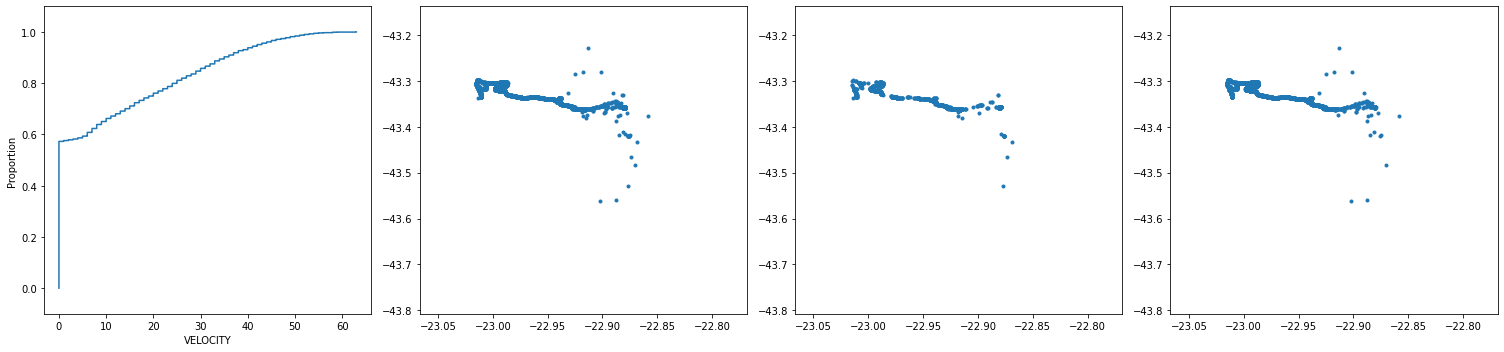

129


-1      603
 82     271
 58     111
 67      86
 62      80
       ... 
 74      11
 126     11
 91      11
 80      11
 106     10
Length: 129, dtype: int64

102


-1     1463
 96     276
 84     137
 64     108
 6       95
       ... 
 3       11
 57      10
 66      10
 41      10
 51      10
Length: 102, dtype: int64

95


-1     1579
 86     270
 11     115
 50     113
 88     102
       ... 
 68      12
 74      11
 64      11
 77      11
 82      11
Length: 95, dtype: int64

72


 6     1534
-1      426
 12     328
 5      189
 4      118
       ... 
 69      11
 24      11
 55      11
 27      10
 42      10
Length: 72, dtype: int64

---------------------------------------------------------------------------------------------------------------
629.0 3994 79


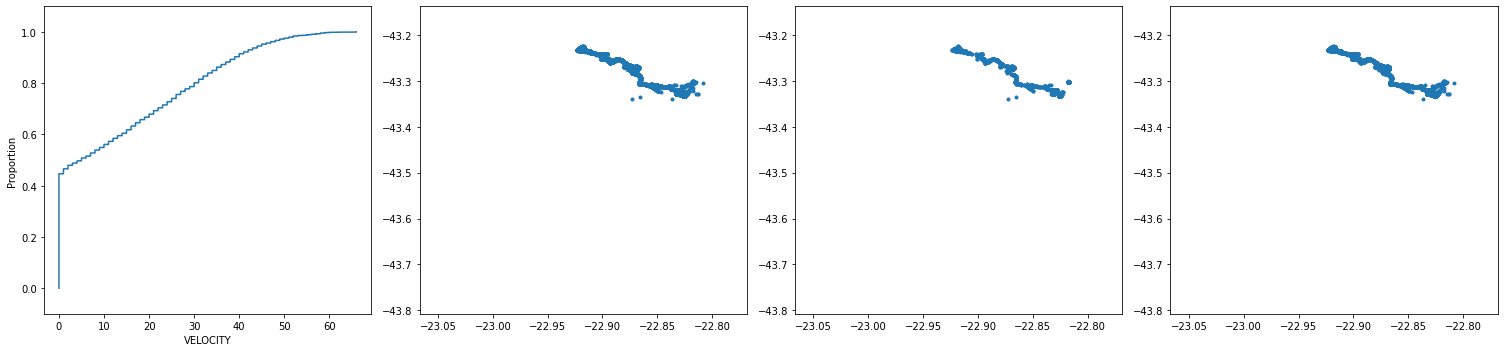

85


 51    740
-1     198
 69    168
 75    134
 26     62
      ... 
 54     14
 70     13
 80     13
 60     13
 62     11
Length: 85, dtype: int64

58


-1     1649
 1      740
 18     167
 31     134
 49      64
 14      63
 48      49
 16      48
 24      48
 42      45
 44      44
 33      44
 52      44
 21      43
 11      34
 32      34
 35      30
 8       29
 38      29
 10      29
 12      29
 19      26
 36      25
 20      23
 56      21
 55      21
 53      21
 0       20
 28      19
 39      19
 25      19
 54      18
 43      18
 50      18
 6       18
 2       18
 22      17
 45      17
 15      17
 46      16
 51      16
 30      15
 3       15
 34      15
 17      14
 37      13
 7       13
 41      13
 27      13
 23      13
 26      13
 9       11
 4       11
 13      11
 47      11
 40      10
 5       10
 29      10
dtype: int64

57


-1     1610
 1      740
 11     167
 48     134
 16     102
 25      58
 13      57
 21      56
 35      51
 32      50
 26      49
 31      44
 55      44
 50      43
 6       35
 47      33
 5       31
 52      29
 9       29
 17      28
 18      25
 23      24
 33      22
 39      22
 0       20
 38      20
 44      19
 36      19
 53      19
 54      19
 19      19
 27      18
 37      17
 43      17
 14      17
 30      17
 46      17
 40      17
 3       17
 4       17
 22      16
 28      16
 8       16
 29      16
 49      15
 10      14
 2       14
 41      13
 51      13
 45      13
 20      12
 12      11
 24      11
 34      11
 42      11
 7       10
 15      10
dtype: int64

31


 3     1251
 27     833
 0      740
-1      228
 1      189
 21     170
 18      65
 6       53
 19      50
 10      34
 8       28
 9       26
 5       26
 16      25
 17      23
 4       22
 12      21
 11      20
 15      19
 29      18
 2       17
 13      17
 23      16
 25      15
 28      15
 20      14
 24      13
 7       13
 14      12
 26      11
 22      10
dtype: int64

---------------------------------------------------------------------------------------------------------------


In [55]:
line_groups = df.groupby('LINE')

for i in line_groups.size().sort_values(ascending=False).index[:10]:
    aux = df.loc[line_groups.groups[i]]
    
    print(i, len(aux), len(aux.BUSID.unique()))
    #print(aux.BUSID.value_counts())
    
    plt.figure(figsize=(21,5))
    
    plt.subplot(141)
    sns.ecdfplot(aux.VELOCITY)
    plt.ylim((-.1, 1.1))
    
    plt.subplot(142)
    plt.plot(aux.LATITUDE, aux.LONGITUDE, '.')
    plt.xlim((df.LATITUDE.min(), df.LATITUDE.max()))
    plt.ylim((df.LONGITUDE.min(), df.LONGITUDE.max()))
    
    plt.subplot(143)
    plt.plot(aux[aux.VELOCITY == 0].LATITUDE, aux[aux.VELOCITY == 0].LONGITUDE, '.')
    plt.xlim((df.LATITUDE.min(), df.LATITUDE.max()))
    plt.ylim((df.LONGITUDE.min(), df.LONGITUDE.max()))
    
    plt.subplot(144)
    plt.plot(aux[aux.VELOCITY != 0].LATITUDE, aux[aux.VELOCITY != 0].LONGITUDE, '.')
    plt.xlim((df.LATITUDE.min(), df.LATITUDE.max()))
    plt.ylim((df.LONGITUDE.min(), df.LONGITUDE.max()))    
    
    plt.tight_layout()
    plt.show()
    
    min_cluster_size = 10
    
    cluster_labels = hdbscan.HDBSCAN(min_cluster_size).fit_predict(aux[['LATITUDE', 'LONGITUDE', 'VELOCITY']])
    print(len(set(cluster_labels)))
    display(pd.value_counts(cluster_labels))
    
    cluster_labels = hdbscan.HDBSCAN(min_cluster_size).fit_predict(skpp.minmax_scale(aux[['LATITUDE', 'LONGITUDE', 'VELOCITY']]))
    print(len(set(cluster_labels)))
    display(pd.value_counts(cluster_labels))
    
    cluster_labels = hdbscan.HDBSCAN(min_cluster_size).fit_predict(skpp.StandardScaler().fit_transform(aux[['LATITUDE', 'LONGITUDE', 'VELOCITY']]))
    print(len(set(cluster_labels)))
    display(pd.value_counts(cluster_labels))
    
    cluster_labels = hdbscan.HDBSCAN(min_cluster_size).fit_predict(skpp.QuantileTransformer().fit_transform(aux[['LATITUDE', 'LONGITUDE', 'VELOCITY']]))
    print(len(set(cluster_labels)))
    display(pd.value_counts(cluster_labels))
    
    
    print('-'*111)